## Dataset preparation for the question answering notebook

We want to construct a balanced dataset with one word answers to questions. We still want 'yes' to have a bigger presence, just in real life, but not to overwhelm the other options during the training process.

In [1]:
import numpy as np
import pandas as pd


import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir('data')

['.DS_Store',
 'S09_question_answer_pairs.txt',
 'enwiki_20180420_100d.txt',
 'S08_question_answer_pairs.txt',
 'dataset_1.csv',
 'train.csv',
 'S10_question_answer_pairs.txt',
 'dataset.csv']

In [3]:
df = pd.read_csv('data/S09_question_answer_pairs.txt',sep = '\t')

In [4]:
df.head()

,ArticleTitle,Question,Answer,DifficultyFromQuestioner,DifficultyFromAnswerer,ArticleFile
0,Alessandro_Volta,Was Volta an Italian physicist?,yes,easy,easy,S09_set4_a10
1,Alessandro_Volta,Was Volta an Italian physicist?,yes,easy,easy,S09_set4_a10
2,Alessandro_Volta,Is Volta buried in the city of Pittsburgh?,no,easy,easy,S09_set4_a10
3,Alessandro_Volta,Is Volta buried in the city of Pittsburgh?,no,easy,easy,S09_set4_a10
4,Alessandro_Volta,Did Volta have a passion for the study of elec...,yes,easy,medium,S09_set4_a10


In [5]:
df = df[['Question','Answer']]

def lower_case(s):
    try:
        a_string = s.lower()
        new_string = re.sub(r'[^\w\s]', '', a_string)
        return new_string
    except:
        return s

df['Answer'] = df['Answer'].map(lower_case)
df['Question'] = df['Question'].map(lower_case)

In [6]:
answer_list = ['yes', 'no', 'indeed', 'what', 'true', 'maybe','perhaps']
df = df[df['Answer'].isin(answer_list)]

In [7]:
len(df)

339

In [8]:
set(df['Answer'].tolist())

{'maybe', 'no', 'true', 'yes'}

In [9]:
df.head()

,Question,Answer
0,was volta an italian physicist,yes
1,was volta an italian physicist,yes
2,is volta buried in the city of pittsburgh,no
3,is volta buried in the city of pittsburgh,no
4,did volta have a passion for the study of elec...,yes


In [10]:
df1 = pd.read_csv('data/S08_question_answer_pairs.txt',sep = '\t')
df1 = df1[['Question','Answer']]
df1['Answer'] = df1['Answer'].map(lower_case)
df1['Question'] = df1['Question'].map(lower_case)
df1 = df1[df1['Answer'].isin(answer_list)]

In [11]:
df1.head()

,Question,Answer
0,was abraham lincoln the sixteenth president of...,yes
1,was abraham lincoln the sixteenth president of...,yes
2,did lincoln sign the national banking act of 1863,yes
3,did lincoln sign the national banking act of 1863,yes
4,did his mother die of pneumonia,no


In [12]:
len(df1), set(df1['Answer'].tolist())

(620, {'no', 'what', 'yes'})

In [13]:
df2 = pd.read_csv('data/S10_question_answer_pairs.txt',sep = '\t',encoding='latin-1')
df2 = df2[['Question','Answer']]
df2['Answer'] = df2['Answer'].map(lower_case)
df2['Question'] = df2['Question'].map(lower_case)
df2 = df2[df2['Answer'].isin(answer_list)]

In [14]:
len(df2), set(df2['Answer'].tolist())

(418, {'no', 'yes'})

In [15]:
data = pd.concat([df,df1,df2])

In [16]:
data.head()

,Question,Answer
0,was volta an italian physicist,yes
1,was volta an italian physicist,yes
2,is volta buried in the city of pittsburgh,no
3,is volta buried in the city of pittsburgh,no
4,did volta have a passion for the study of elec...,yes


In [17]:
data.drop_duplicates(inplace=True)

In [18]:
len(data)

994

In [19]:
df3 = pd.read_csv( 'data/train.csv')

In [20]:
df3.columns =['cat', 'Question','Question_ext','Answer']
df3 = df3[['Question','Answer']]
df3.head(3)

,Question,Answer
0,What is the best off-road motorcycle trail ?,i hear that the mojave road is amazing!<br />\...
1,What is Trans Fat? How to reduce that?,Trans fats occur in manufactured foods during ...
2,How many planes Fedex has?,according to the www.fedex.com web site:\nAir ...


In [21]:
df3['Answer'] = df3['Answer'].map(lower_case)
df3['Question'] = df3['Question'].map(lower_case)

In [22]:

df3 = df3[df3['Answer'].isin(answer_list[1:])]

In [23]:
df3.head()

,Question,Answer
260,any great top quality language schools in dallas,no
775,is prostitution legal in las vegas,no
1090,are there any marriage minded asian females ou...,perhaps
1371,is george bush the anti christ,no
2357,can you go back in time and kill yourself,no


In [24]:
len(df3)

3065

In [25]:
df3no = df3[df3['Answer'] == 'no']
df3other = df3[df3['Answer'] != 'no']

In [26]:
df3no = df3no.iloc[:450]

In [27]:
data = pd.concat([data,df3no,df3other])

In [28]:
len(data)

2002

In [29]:
len(data[data['Answer'] == 'no'])

637

In [30]:
sinodict = {'maybe':'perhaps','true':'yes','indeed':'yes'}
def map_sinonims(string):
    if string in sinodict.keys():
        return sinodict[string]
    else:
        return string

In [31]:
data['Answer'] = data['Answer'].map(map_sinonims)

<AxesSubplot:xlabel='count', ylabel='Answer'>

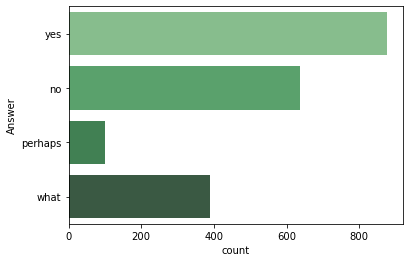

In [32]:
sns.countplot(y='Answer',  data=data, palette="Greens_d")

In [33]:
data.to_csv('data/dataset.csv',index=False)